# Exercício 1

## Bibliotecas

In [33]:
# Bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
from numpy import exp, log

## Gráfico Inicial

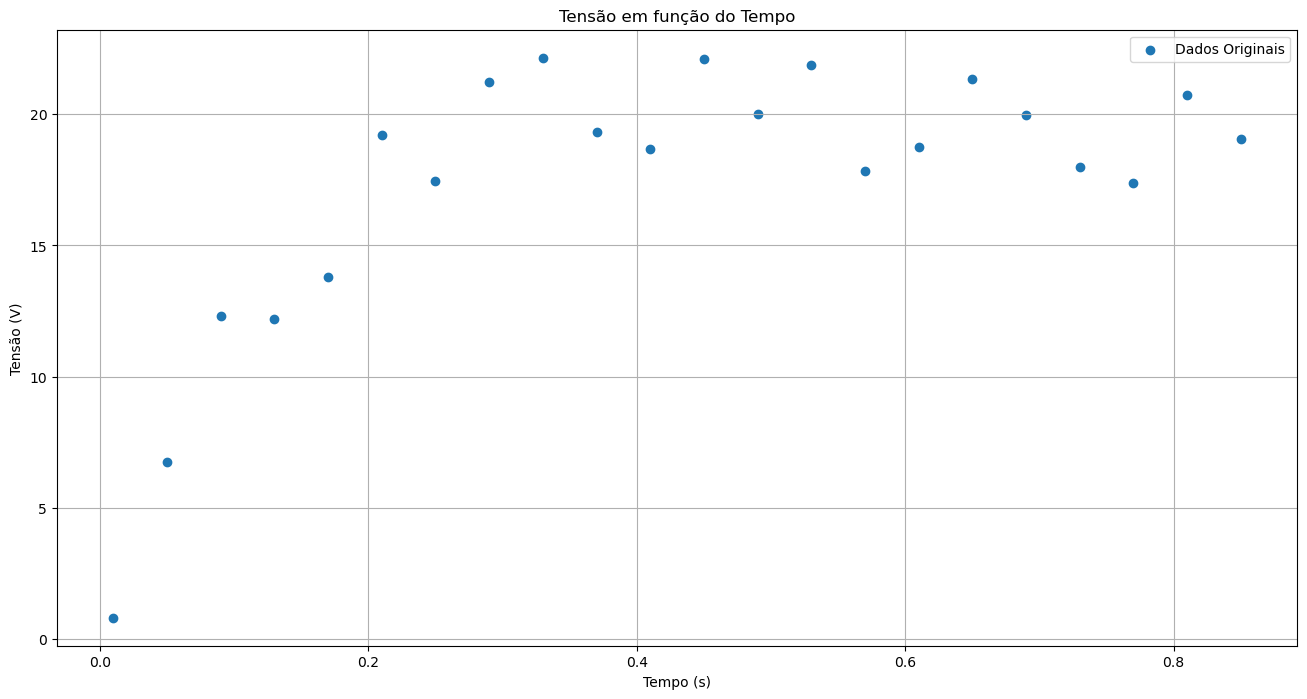

In [6]:
# Gráfico
df = pd.read_csv('data.csv')

x = df['tempo']
y = df['tensao']


plt.figure(figsize=(16, 8))
plt.scatter(x, y, label='Dados Originais')

plt.xlabel('Tempo (s)')
plt.ylabel('Tensão (V)')	
plt.title('Tensão em função do Tempo')
plt.legend()
plt.grid(True)

plt.show()

## Cálculo dos coeficientes

Objetivo: Regressão Logarítmica
- $ y = a + b\ln{x} $

Cálculo do "a" e "b":

- Seja $x'_i = \ln(x_i)$;
- O modelo se torna $y = a + b x'$.
- Ou seja, apenas adaptamos as fórmulas da regressão linear simples

$$ 
\begin{split}
b & = \frac{ \sum_{i=1}^{n}{(x'_i - \overline{x'}) (y_i - \overline{y}) } } {\sum_{i=1}^{n}(x'_i - \overline{x'})^2} = \frac{ \sum_{i=1}^{n}{(\ln(x_i) - \overline{\ln(x)}) (y_i - \overline{y}) } } {\sum_{i=1}^{n}(\ln(x_i) - \overline{\ln(x)})^2} \\
\\
a & = \overline{y} - b \overline{x'} = \overline{y} - b \overline{\ln(x)}
\end{split}
$$

In [41]:
ln_x = log(df['tempo'])

# Calcular médias
ln_x_mean = ln_x.mean()
y_mean = df['tensao'].mean() # ou tension_average se já calculado

# 3. Calcular b
# Numerador de b
b_numerator = ((ln_x - ln_x_mean) * (df['tensao'] - y_mean)).sum()
# Denominador de b
b_denominator = ((ln_x - ln_x_mean)**2).sum()

b_log = b_numerator / b_denominator

# 4. Calcular a
a_log = y_mean - b_log * ln_x_mean

print(f'Para o modelo y = a + b*ln(x):')
print(f'Coeficiente a (intercepto): {a_log}')
print(f'Coeficiente b (inclinação de ln(x)): {b_log}')

Para o modelo y = a + b*ln(x):
Coeficiente a (intercepto): 22.49486993238771
Coeficiente b (inclinação de ln(x)): 4.3886955835098895


## Gráfico de Regressão Logarítmica

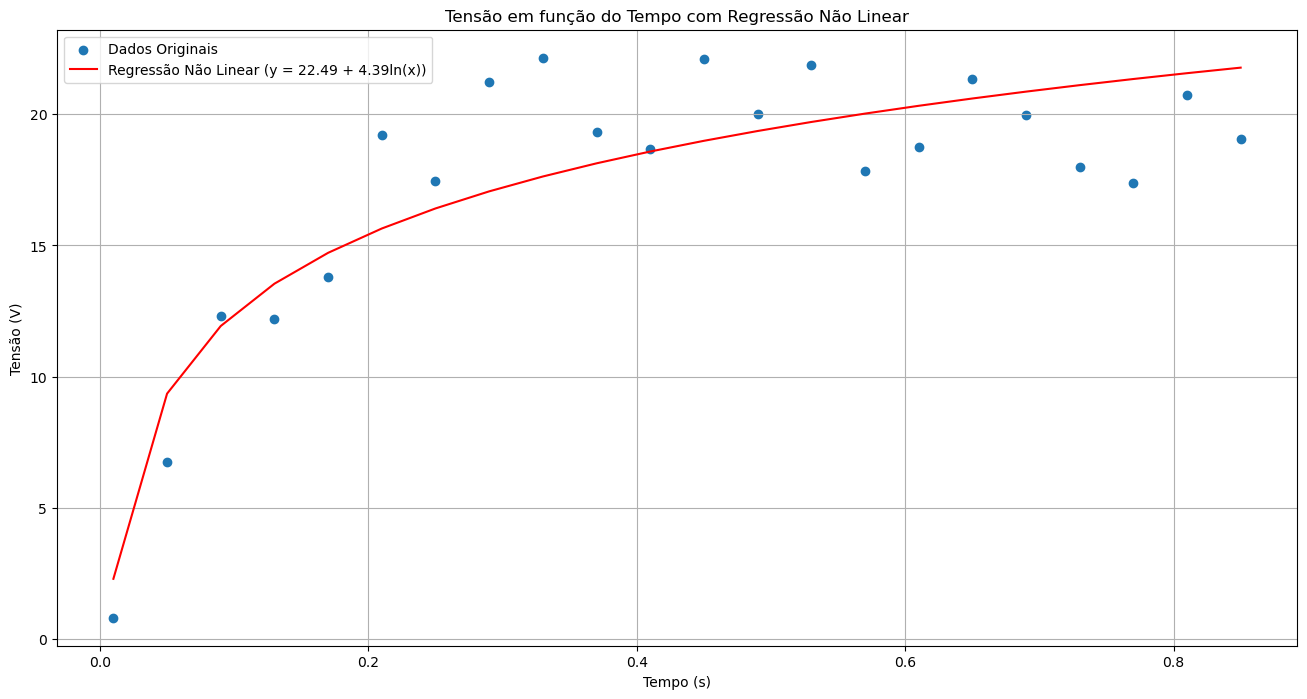

In [47]:
y_reg_log = a_log + b_log * log(x)

plt.figure(figsize=(16, 8))
plt.scatter(x, y, label='Dados Originais')
plt.plot(x, y_reg_log, color='red', label=f'Regressão Não Linear (y = {a_log:.2f} + {b_log:.2f}ln(x))') # Plotar a regressão

plt.xlabel('Tempo (s)')
plt.ylabel('Tensão (V)')	
plt.title('Tensão em função do Tempo com Regressão Não Linear')
plt.legend()
plt.grid(True)

plt.show()

## Erro Quadrático Médio

In [58]:
error = (y - y_reg_log).pow(2)
print(f'Erro quadrático médio: {error.mean()}')

Erro quadrático médio: 5.538010621070092
